## 逻辑回归-对数几率回归

- 是以Sigmoid函数作为基础的线性分类方法: $ \sigma(z) = \frac{1}{1+e^{-z}}$

- 利用mle去求极大值, 因为 $y \in \{0,1\}$, 所以可以利用y进行筛选其中一项, 可以得到最终方程: $$ p = P(y|x) = p^y_1*p^{1-y}_0$$

- 使用mle求解最优参数:
$$\begin{align} \hat{w} 
= & \arg\max\limits_{\theta}log(P(Y|X)) \\
= & \arg\max\limits_{\theta}log(\prod_{i=1}^{N}P(y_i|x_i)) \\
= & \arg\max\limits_{\theta}\sum_{n=1}^N log(p^{y_i}_1*p^{1-y_i}_0)\\
= & \arg\max\limits_{\theta}\sum_{n=1}^N (y_ilogp_1+ (1-y_i)logp_0)\\
\end{align}
$$

- 求导: $$ \frac {\delta J(W)} {\delta W} = \sum_{n=1}^N (y_i- p_1)x_i$$

- 使用梯度下降法或拟牛顿发求L(w)的极大值点

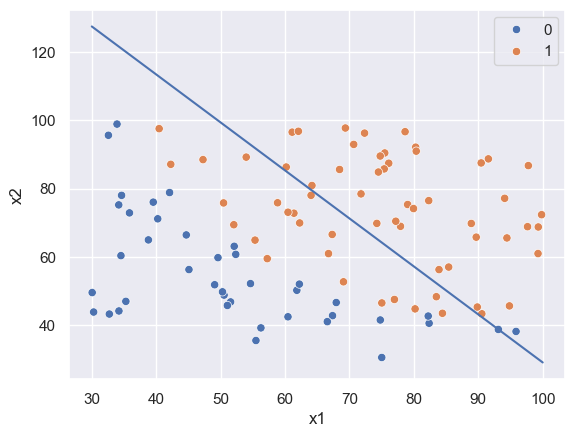

array([0.    , 0.    , 0.    , 0.9728, 1.    , 0.    , 1.    , 0.    ,
       1.    , 0.    , 0.9999, 0.    , 1.    , 1.    , 0.    , 0.    ,
       0.    , 0.    , 1.    , 0.    , 0.    , 1.    , 0.    , 0.    ,
       1.    , 0.    , 0.    , 0.4871, 0.    , 0.    , 0.    , 1.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.9848, 0.    , 0.    ,
       1.    , 0.    , 1.    , 0.    , 0.    , 0.    , 1.    , 1.    ,
       1.    , 1.    , 1.    , 1.    , 0.9404, 0.    , 0.    , 0.    ,
       1.    , 0.    , 1.    , 1.    , 1.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.0101,
       1.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ,
       1.    , 1.    , 0.    , 0.    , 1.    , 1.    , 0.    , 1.    ,
       1.    , 0.    , 1.    , 1.    , 0.    , 1.    , 0.9962, 0.    ,
       0.    , 1.    , 0.    , 1.    ])

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# from sklearn.preprocessing import StandardScaler
# scaler_ss = StandardScaler()
# result_ss = scaler_ss.fit_transform(data_rn)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, num_iterations, learning_rate):
    m, n = X.shape
    theta = np.zeros(n)

    for i in range(num_iterations):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / m
        theta -= learning_rate * gradient
    return theta

dataUrl = '.\\scatter.csv'
df = pd.read_csv(dataUrl)

# 绘制图片
sns.set()
sns.scatterplot(x="x1", y="x2", hue="y",data=df)

# 从df中获取数据
y = np.array(df)[:,2]
# 将y项变为偏置项
X = np.array(df.replace({0:1}))[:, [2,0,1]]
# 训练模型, 这比训练得开到这么大才能收敛啊~~~
num_iterations = 100000
learning_rate = 0.1
w = logistic_regression(X,y, num_iterations, learning_rate)

x_points = np.linspace(30,100, 70)
# w0 + w1*x1 + w2*x2 = 0 => x2 = (w0+w1*x2)/(-w2)
y_ = (w[0] + w[1] * x_points)/-w[2]
sns.lineplot(x=x_points, y = y_)
plt.show()

# 使用训练好的参数进行预测
def predict(X, theta):
    predictions = sigmoid(np.dot(X, theta))
    return predictions

np.round(predict(X, w), 4)